# Step 1:
----------------------------------------------------------
##  Import Libraries
----------------------------------------------------------

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 2
----------------------------------------------------------
### Load and Inspect the Dataset
---------------------------------------------------------

In [7]:
df = pd.read_csv('exchange-rates_zaf.csv')
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")


# Display initial data info
print("INITIAL DATA INSPECTION")
print("\nFirst 5 rows (before cleaning):")
print(df.head())
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")

# Remove the header row (first row contains metadata)
df = df[df['Iso3'] != '#country+code'].reset_index(drop=True)

# Convert Year and Value columns to numeric data types
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Check for and report missing values after conversion
missing_before = df.isnull().sum()
if missing_before.sum() > 0:
    print(f"\n Missing values:\n{missing_before[missing_before > 0]}")
    df = df.dropna(subset=['Year', 'Value'])
    print(f"Rows after removing missing values: {len(df)}")

print("\nDataset loaded and cleaned!")

Dataset loaded: 759 rows, 17 columns
INITIAL DATA INSPECTION

First 5 rows (before cleaning):
            Iso3    StartDate     EndDate  Area Code Area Code (M49)  \
0  #country+code  #date+start   #date+end        NaN             NaN   
1            ZAF   1970-01-01  1970-12-31      202.0            '710   
2            ZAF   1970-01-01  1970-01-31      202.0            '710   
3            ZAF   1970-02-01  1970-02-28      202.0            '710   
4            ZAF   1970-03-01  1970-03-31      202.0            '710   

            Area Element Code                       Element ISO Currency Code  \
0  #country+name          NaN                           NaN               NaN   
1   South Africa          LCU  Local currency units per USD               ZAR   
2   South Africa          LCU  Local currency units per USD               ZAR   
3   South Africa          LCU  Local currency units per USD               ZAR   
4   South Africa          LCU  Local currency units per USD         

# Step 3
----------------------------------------------------------
### Filter Data for Years 2014-2023 (Annual Values)
----------------------------------------------------------
#### Filter for annual values only and years between 2014 and 2023

# Step 4
----------------------------------------------------------
###  Create Line Plot
----------------------------------------------------------

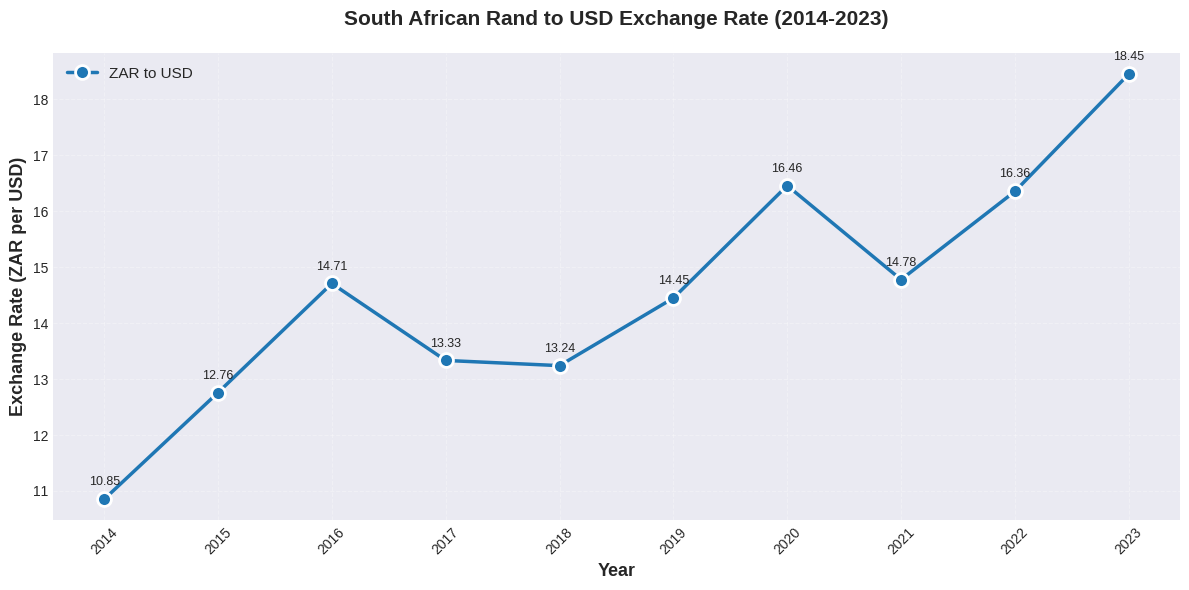

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(years, exchange_rates, marker='o', linestyle='-', linewidth=2.5,
         markersize=10, color='#1f77b4', markeredgecolor='white',
         markeredgewidth=2, label='ZAR to USD')

# Add value labels on points
for x, y in zip(years, exchange_rates):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9)

plt.xlabel('Year', fontsize=13, fontweight='bold')
plt.ylabel('Exchange Rate (ZAR per USD)', fontsize=13, fontweight='bold')
plt.title('South African Rand to USD Exchange Rate (2014-2023)',
          fontsize=15, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='best')
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


----------------------------------------------------------
###  Create Scatter Plot
----------------------------------------------------------

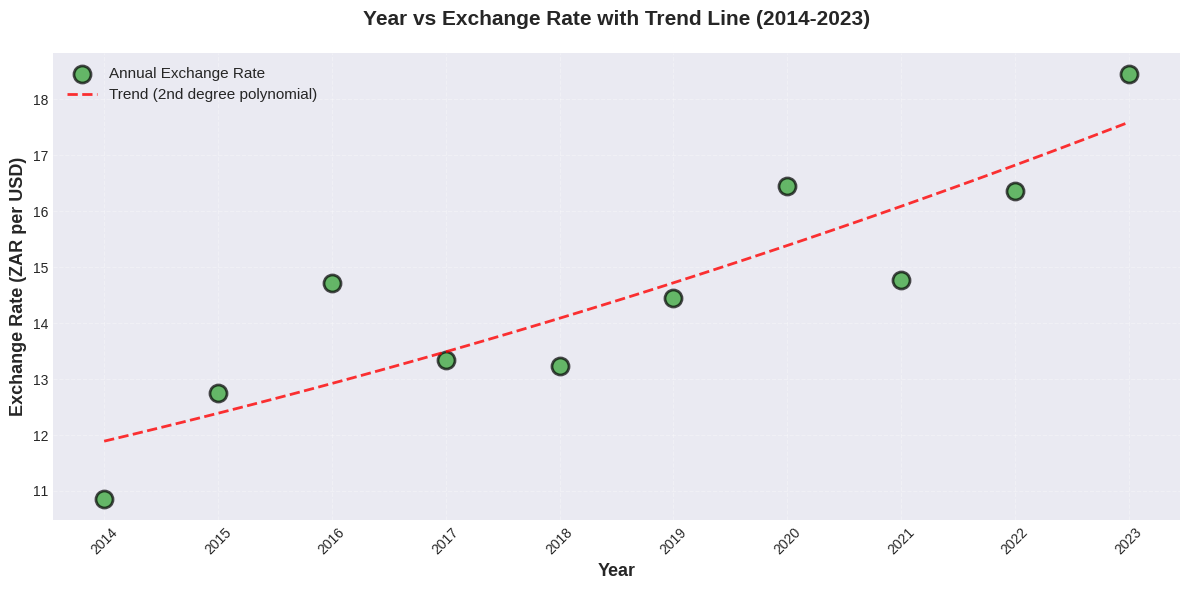

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(years, exchange_rates, s=150, color='#2ca02c', alpha=0.7,
           edgecolors='black', linewidths=2, label='Annual Exchange Rate')

# Add trend line
z = np.polyfit(years, exchange_rates, 2)
p = np.poly1d(z)
years_smooth = np.linspace(years.min(), years.max(), 100)
plt.plot(years_smooth, p(years_smooth), "--", color='red', linewidth=2,
         alpha=0.8, label='Trend (2nd degree polynomial)')

plt.xlabel('Year', fontsize=13, fontweight='bold')
plt.ylabel('Exchange Rate (ZAR per USD)', fontsize=13, fontweight='bold')
plt.title('Year vs Exchange Rate with Trend Line (2014-2023)',
          fontsize=15, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='best')
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

----------------------------------------------------------
### Create Histogram
----------------------------------------------------------

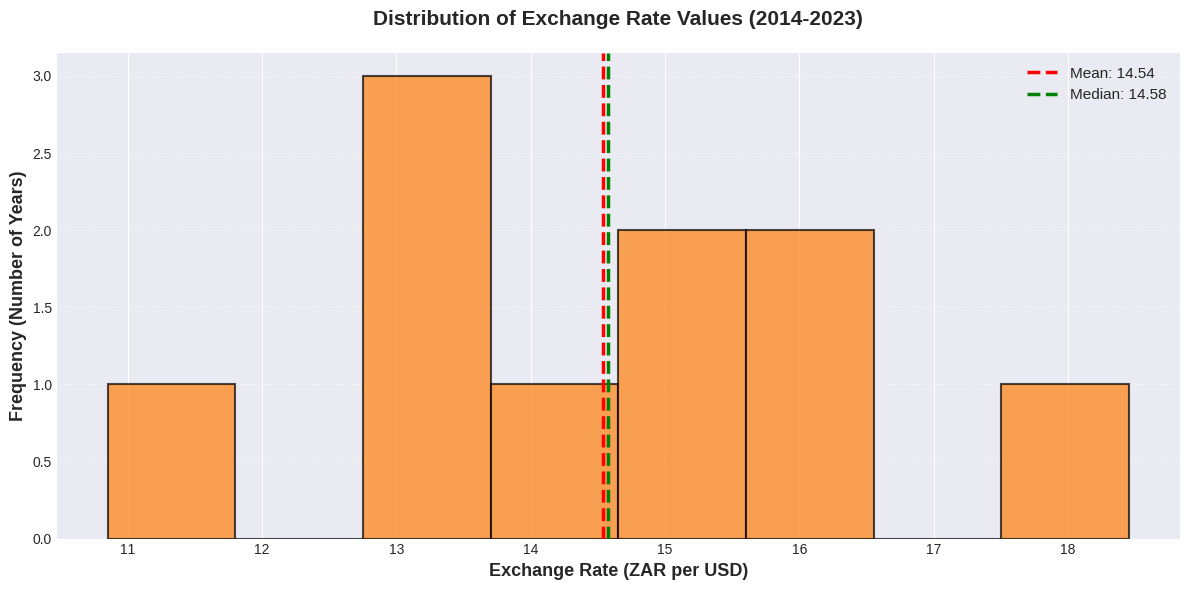

In [18]:
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(exchange_rates, bins=8, color='#ff7f0e',
                            alpha=0.7, edgecolor='black', linewidth=1.5)

# Mean line
mean_rate = exchange_rates.mean()
plt.axvline(mean_rate, color='red', linestyle='--', linewidth=2.5,
           label=f'Mean: {mean_rate:.2f}')

# Median line
median_rate = np.median(exchange_rates)
plt.axvline(median_rate, color='green', linestyle='--', linewidth=2.5,
           label=f'Median: {median_rate:.2f}')

plt.xlabel('Exchange Rate (ZAR per USD)', fontsize=13, fontweight='bold')
plt.ylabel('Frequency (Number of Years)', fontsize=13, fontweight='bold')
plt.title('Distribution of Exchange Rate Values (2014-2023)',
          fontsize=15, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.legend(fontsize=11, loc='best')
plt.tight_layout()
plt.show()


# Step 5
----------------------------------------------------------
### Display Comprehensive Statistics
----------------------------------------------------------


In [21]:
print("COMPREHENSIVE STATISTICAL SUMMARY (2014-2023)")

# Basic statistics
print(f"\n Basic Statistics:")
print(f"   - Number of Years: {len(exchange_rates)}")
print(f"   - Minimum Rate: {exchange_rates.min():.4f} ZAR/USD (Year: {years[exchange_rates.argmin()]})")
print(f"   - Maximum Rate: {exchange_rates.max():.4f} ZAR/USD (Year: {years[exchange_rates.argmax()]})")
print(f"   - Average Rate: {exchange_rates.mean():.4f} ZAR/USD")
print(f"   - Median Rate: {np.median(exchange_rates):.4f} ZAR/USD")
print(f"   - Standard Deviation: {exchange_rates.std():.4f}")

# Variability metrics
cv = (exchange_rates.std() / exchange_rates.mean()) * 100
print(f"\n Variability:")
print(f"   - Coefficient of Variation: {cv:.2f}%")
print(f"   – Range: {exchange_rates.max() - exchange_rates.min():.4f} ZAR/USD")
print(f"   - Interquartile Range (IQR): {np.percentile(exchange_rates, 75) - np.percentile(exchange_rates, 25):.4f}")

# Year-over-year changes
yoy_changes = np.diff(exchange_rates)
yoy_pct_changes = (np.diff(exchange_rates) / exchange_rates[:-1]) * 100

print(f"\n Year-over-Year Analysis:")
print(f"   - Average YoY Change: {yoy_changes.mean():.4f} ZAR/USD ({yoy_pct_changes.mean():.2f}%)")
print(f"   - Largest Increase: {yoy_changes.max():.4f} ZAR/USD ({yoy_pct_changes.max():.2f}%)")
print(f"   - Largest Decrease: {yoy_changes.min():.4f} ZAR/USD ({yoy_pct_changes.min():.2f}%)")

# Overall trend
total_change = exchange_rates[-1] - exchange_rates[0]
total_pct_change = ((exchange_rates[-1] - exchange_rates[0]) / exchange_rates[0]) * 100
print(f"\n Overall Trend (2014-2023):")
print(f"   - Total Change: {total_change:+.4f} ZAR/USD ({total_pct_change:+.2f}%)")
print(f"   - Direction: {'Depreciation' if total_change > 0 else 'Appreciation'} of ZAR")



COMPREHENSIVE STATISTICAL SUMMARY (2014-2023)

 Basic Statistics:
   - Number of Years: 10
   - Minimum Rate: 10.8527 ZAR/USD (Year: 2014)
   - Maximum Rate: 18.4534 ZAR/USD (Year: 2023)
   - Average Rate: 14.5391 ZAR/USD
   - Median Rate: 14.5790 ZAR/USD
   - Standard Deviation: 2.0567

 Variability:
   - Coefficient of Variation: 14.15%
   – Range: 7.6008 ZAR/USD
   - Interquartile Range (IQR): 2.6974

 Year-over-Year Analysis:
   - Average YoY Change: 0.8445 ZAR/USD (6.57%)
   - Largest Increase: 2.0976 ZAR/USD (17.57%)
   - Largest Decrease: -1.6804 ZAR/USD (-10.21%)

 Overall Trend (2014-2023):
   - Total Change: +7.6008 ZAR/USD (+70.04%)
   - Direction: Depreciation of ZAR
